

<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

## PGE 383 Graduate Student Project Template 

#### Michael Pyrcz, Associate Professor, University of Texas at Austin 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### General Guidance

I'm expecting an **educational product** that could be handed to a student and they could quickly learn a new concept. Ask yourself, could someone new to machine learning understand my workflow?

* this is a win-win since it is  an opportunity to you to dive deeper and explore a concepted related to a machine learning algorithm and is good practice for communicating machine learning with others (something that you will have to do at work)

#### Expectations for Your Well-documented Workflow

* **flow** include a consistent narrative, e.g., no 2 code blocks should be adjacent, always have a short statement to explain, connect to the next code block

* **concise** be as concise as possible:

    * use point form (except for the executive summary) 
    * use effective, creative figures that combine what could have been in multiple plots onto a single plot when possible
    * every line of code, statment or figure must have purpose
    * conciseness is part of the grading, don't add content that isn't needed
    * aim for 4-5 pages of Jupyter notebook
    
* be very clear

    * great executive summary
    * label every axis
    * use readable code, logical variable names, use available functionality for compactness
  
#### Using Code From Others
  
You may use blocks/snipets of code from other sources with citation. To cite a set of code separate in a block and do this in the markdown above the block.

The following code block is from Professor Michael Pyrcz (@GeostatsGuy), SubSurfuceDataAnalytics_PCA.ipynb from [GeostatsGuy GitHub](https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/SubsurfaceDataAnalytics_PCA.ipynb).

```python
def simple_simple_krige(df,xcol,ycol,vcol,dfl,xlcol,ylcol,vario,skmean):
# load the variogram
    nst = vario['nst']; pmx = 9999.9
    cc = np.zeros(nst); aa = np.zeros(nst); it = np.zeros(nst)
```

or use inline citations such as this for a few of lines of code.

```python
def simple_simple_krige(df,xcol,ycol,vcol,dfl,xlcol,ylcol,vario,skmean): # function from Professor Michael Pyrcz,https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/SubsurfaceDataAnalytics_PCA.ipynb 
```

#### The Workflow Template

Here's the template for your workflow.

____________________



## Drilling kicks classification using Random Forest and Extremely Random Forest

#### Santiago Callerio
#### Hildebrand Department of Petroleum and Geosystems Engineering, Cockrell School of Engineering

### Subsurface Machine Learning Course, The University of Texas at Austin
#### Hildebrand Department of Petroleum and Geosystems Engineering, Cockrell School of Engineering
#### Department of Geological Sciences, Jackson School of Geosciences




_____________________

Workflow supervision and review by:

#### Instructor: Prof. Michael Pyrcz, Ph.D., P.Eng., Associate Professor, The Univeristy of Texas at Austin
##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Course TA: Lei Liu, Graduate Student, The University of Texas at Austin
##### [LinkedIn](https://www.linkedin.com/in/misaelmmorales/)


### Executive Summary

* What is the gap, problem, opportunity, scientific question?
    - The task involves the classification of drilling kicks risk using Random Forest and Extremely Random Forest classifiers. A priori, it is not possible to classify a kick and the risk of exceeding the surface or subsurface limits based on the well parameters, since these evolve as the kick is circulated to surface. For this task several simulations are required, usualy performed as a Monte Carlo simulation to seach the whole space of possibilities and parameters uncertainties.

    - A classifier based on the entry data for the simulation parameters can help to shrink down the search space to understand the limits imposed by the case.

* What was done to address the above?

* What was learned?

* What are your recommendations?

**Guidance**: Write as a single paragraph with 4 or so well-writen sentences.

### Import Packages


In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.style as style
style.use('tableau-colorblind10')
#style.use('seaborn-notebook')
# style.use('seaborn-whitegrid')

# plt.rcParams['font.family'] = 'Times New Roman'
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.family'] = 'Arial'
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

### Functions

The following functions will be used in the workflow.

In [2]:
def load_csv_data(foldername, filename):
    '''
    Load csv data and return pandas dataframe
    '''
    filepath = '/'.join([foldername, filename])
    csv_data = pd.read_csv(filepath)
    return csv_data

def extract_td(filename_str):
    '''
    Extract total depth from filename string
    '''
    filename_str = filename_str #ref_table['filename']
    idx_start = filename_str.find('_TD_')+4
    idx_end = filename_str.find('ft')
    td = int(filename_str[idx_start:idx_end])
    return td

### Load Data

The following workflow applies a synthetic dataset for drilling kick simulations, generated with the UT RAPID consortium advanced hydraulics simulator running a Monte Carlo simulation for the input parameters distribution (input parameters are also synthetic). The dataset is composed by .csv files from 3 different sections of a deep-water well (8.5 inch, 12.25 inch and 14.5 inch).

We will work with the following features:

* **kick intensity** - delta pressure between the set bottom hole pressure while drilling and the reservoir pressure during the kick event, expressed in units of ppg (pounds per gallon)
* **permeability** - named as 'k_reservoir', this parameter describes the ability of a fluid to flow through the rock in miliDarcy
* **reservoir exposed length** - named as 'h_reservoir', this parameter describes the length or height of exposed reservoir or productive formation when the kick occurs, in units of feet
* **porosity** - named as 'porosity_reservoir',fraction of rock void in units of percentage
* **pit gain** - measured pit level increase after the kick event, which is representative of the volume of the donwhole influx, expressed in units of barrels
* **SBP shut-in** - wellhead pressure (annular pressure) when the well is shut-in after the influx event, expressed in units of psi
* **kick time** - represents the time it takes to control the kick, which will directly influence the kick's final volume, expressed in seconds
* **total depth** - named 'TD', this parameter describes each section total depth which is the same depth as the kick simulation, expressed in feet
* **hole section** - this describes the hole section diameter in which the kick was simulated, expressed in inches
* **kick classification** - this describes the risk related to the ability of circulating the kick out of the well, without exceeding the surface equipment limitations

In [3]:
# Load 8.5 in HS data
foldername = r'https://raw.githubusercontent.com/SCallerio/data_SSML/master'
filename = '85HS_SBM_results_distribution.csv'
pit_gain_distribution_results = load_csv_data(foldername, filename) #pd.read_csv(filepath).astype(float)
pit_gain_distribution_results.columns = ['case_number','pit_gain','p_shoe','sbp_dyn_control','sbp_shut_in']
filename = 'ref_table_85HS.csv'
ref_table = load_csv_data(foldername, filename) #pd.read_csv(filepath)
ref_table.iloc[:,2:] = ref_table.iloc[:,2:].astype(float)
# Merge data into ref_table
ref_table = ref_table.merge(pit_gain_distribution_results,on='case_number')

# Load 12.25 in HS data
filename = 'results_distribution_1225HS.csv'
pit_gain_distribution_results_i = load_csv_data(foldername, filename) #pd.read_csv(filepath).astype(float)
pit_gain_distribution_results_i.columns = ['case_number','pit_gain','p_shoe','sbp_dyn_control','sbp_shut_in']
filename = 'ref_table_1225HS.csv'
ref_table_i = load_csv_data(foldername, filename) #pd.read_csv(filepath)
ref_table_i.iloc[:,2:] = ref_table_i.iloc[:,2:].astype(float)
# Merge data into ref_table
ref_table_i = ref_table_i.merge(pit_gain_distribution_results_i,on='case_number')

# Concat to ref_table
ref_table = pd.concat([ref_table, ref_table_i])
ref_table

# Load 14.5 in HS data
filename = 'results_distribution_145HS.csv'
pit_gain_distribution_results_i = load_csv_data(foldername, filename).iloc[:,:5] #pd.read_csv(filepath).astype(float)
pit_gain_distribution_results_i.columns = ['case_number','pit_gain','p_shoe','sbp_dyn_control','sbp_shut_in']
filename = 'ref_table_145HS.csv'
ref_table_i = load_csv_data(foldername, filename) #pd.read_csv(filepath)
ref_table_i.iloc[:,2:] = ref_table_i.iloc[:,2:].astype(float)
# Merge data into ref_table
ref_table_i = ref_table_i.merge(pit_gain_distribution_results_i,on='case_number')

# Concat to ref_table
ref_table = pd.concat([ref_table, ref_table_i]).reset_index(drop=True)
ref_table.head()

,filename,thermal_gradient,circulation_rate,kick_intensity,kick_time,k_reservoir,h_reservoir,porosity_reservoir,ECD_SP,case_number,pit_gain,p_shoe,sbp_dyn_control,sbp_shut_in
0,Case2_TD_21325ft_Event_DynamicControl_SBM.mat,1.802182,594.020858,468.690918,96.137036,34.460709,31.637421,0.179602,13195.91,2.0,4.323293,11196.29,762.0789,1289.315
1,Case4_TD_21325ft_Event_DynamicControl_SBM.mat,1.802182,634.500511,513.123352,122.680206,19.950880,49.144908,0.093805,13195.91,4.0,5.429620,11250.81,792.3320,1330.357
2,Case8_TD_21325ft_Event_DynamicControl_SBM.mat,1.802182,614.252983,588.288857,70.544860,23.704196,33.868315,0.067917,13195.91,8.0,2.990084,11365.51,867.9596,1399.775
3,Case6_TD_21325ft_Event_DynamicControl_SBM.mat,1.802182,512.953816,477.124630,61.701274,7.844398,45.250029,0.208615,13195.91,6.0,1.313111,11240.57,801.9800,1296.206
4,Case1_TD_21325ft_Event_DynamicControl_SBM.mat,1.802182,608.344826,512.535912,75.749490,26.403263,52.799141,0.192934,13195.91,1.0,4.428071,11234.44,794.5355,1325.894


### Data Preparation

In [4]:
# Create TD column
ref_table['TD'] =  [extract_td(filename_str) for filename_str in ref_table['filename']] #ref_table.apply(lambda x: extract_td(ref_table))
# Compute Kick Intensity column
ref_table['kick_intensity_ppg'] = ref_table['kick_intensity']/(0.052*ref_table['TD'])
# Hole Section column
conditions = [ref_table['TD'] == ref_table['TD'].unique()[0],
             ref_table['TD'] == ref_table['TD'].unique()[1],
             ref_table['TD'] == ref_table['TD'].unique()[2]]
selections = [8.5, 12.25, 14.5]
ref_table['hole_section'] = np.select(conditions, selections)

Kick classification is generated as a column which is dependent upon pit gain (kick volume), and kick intensity. The following thresholds and classifications are generated:
- **High Risk** - this implies that the kick has a high risk of exceeding either surface or subsurface limits
    - Volume Threshold > 8 bbl
    - Wellhead Pressure Threshold >= 1000 psi
   
- **Medium Risk** - this implies that the kick has a medium risk of exceeding either surface or subsurface limits (lower than high risk but still risky)
    - 5 bbl < Volume Threshold <= 8 bbl
    - 800 psi <= Wellhead Pressure Threshold < 1000 psi
    
- **Low Risk** - this implies that the kick has a low risk of exceeding either surface or subsurface limits (lower than medium risk)

In [53]:
# Generate kick classfication
conditions = [(ref_table['pit_gain'] > 8) & (ref_table['sbp_shut_in'] >= 1000),
             (ref_table['pit_gain'] <= 8) & (ref_table['pit_gain'] > 5) &
              (ref_table['sbp_shut_in'] < 1000) & (ref_table['sbp_shut_in'] >= 800)]
selection = ['High_Risk', 'Medium_Risk']
ref_table['kick_classification'] = np.select(conditions, selection, default='Low_Risk')

A separate dataframe is generated with the interest features.

In [54]:
data_df = ref_table[['pit_gain',
                     'sbp_shut_in',
                     'kick_intensity_ppg',
                     'kick_time',
                     'k_reservoir',
                     'h_reservoir',
                     'porosity_reservoir',
                     'hole_section',
                     'TD',
                     'kick_classification']]

### Data Visualization and Exploration

First, a pairplot of the main features is performed, to understand the distributions and any potential correlations. The data is segmented per hole section.

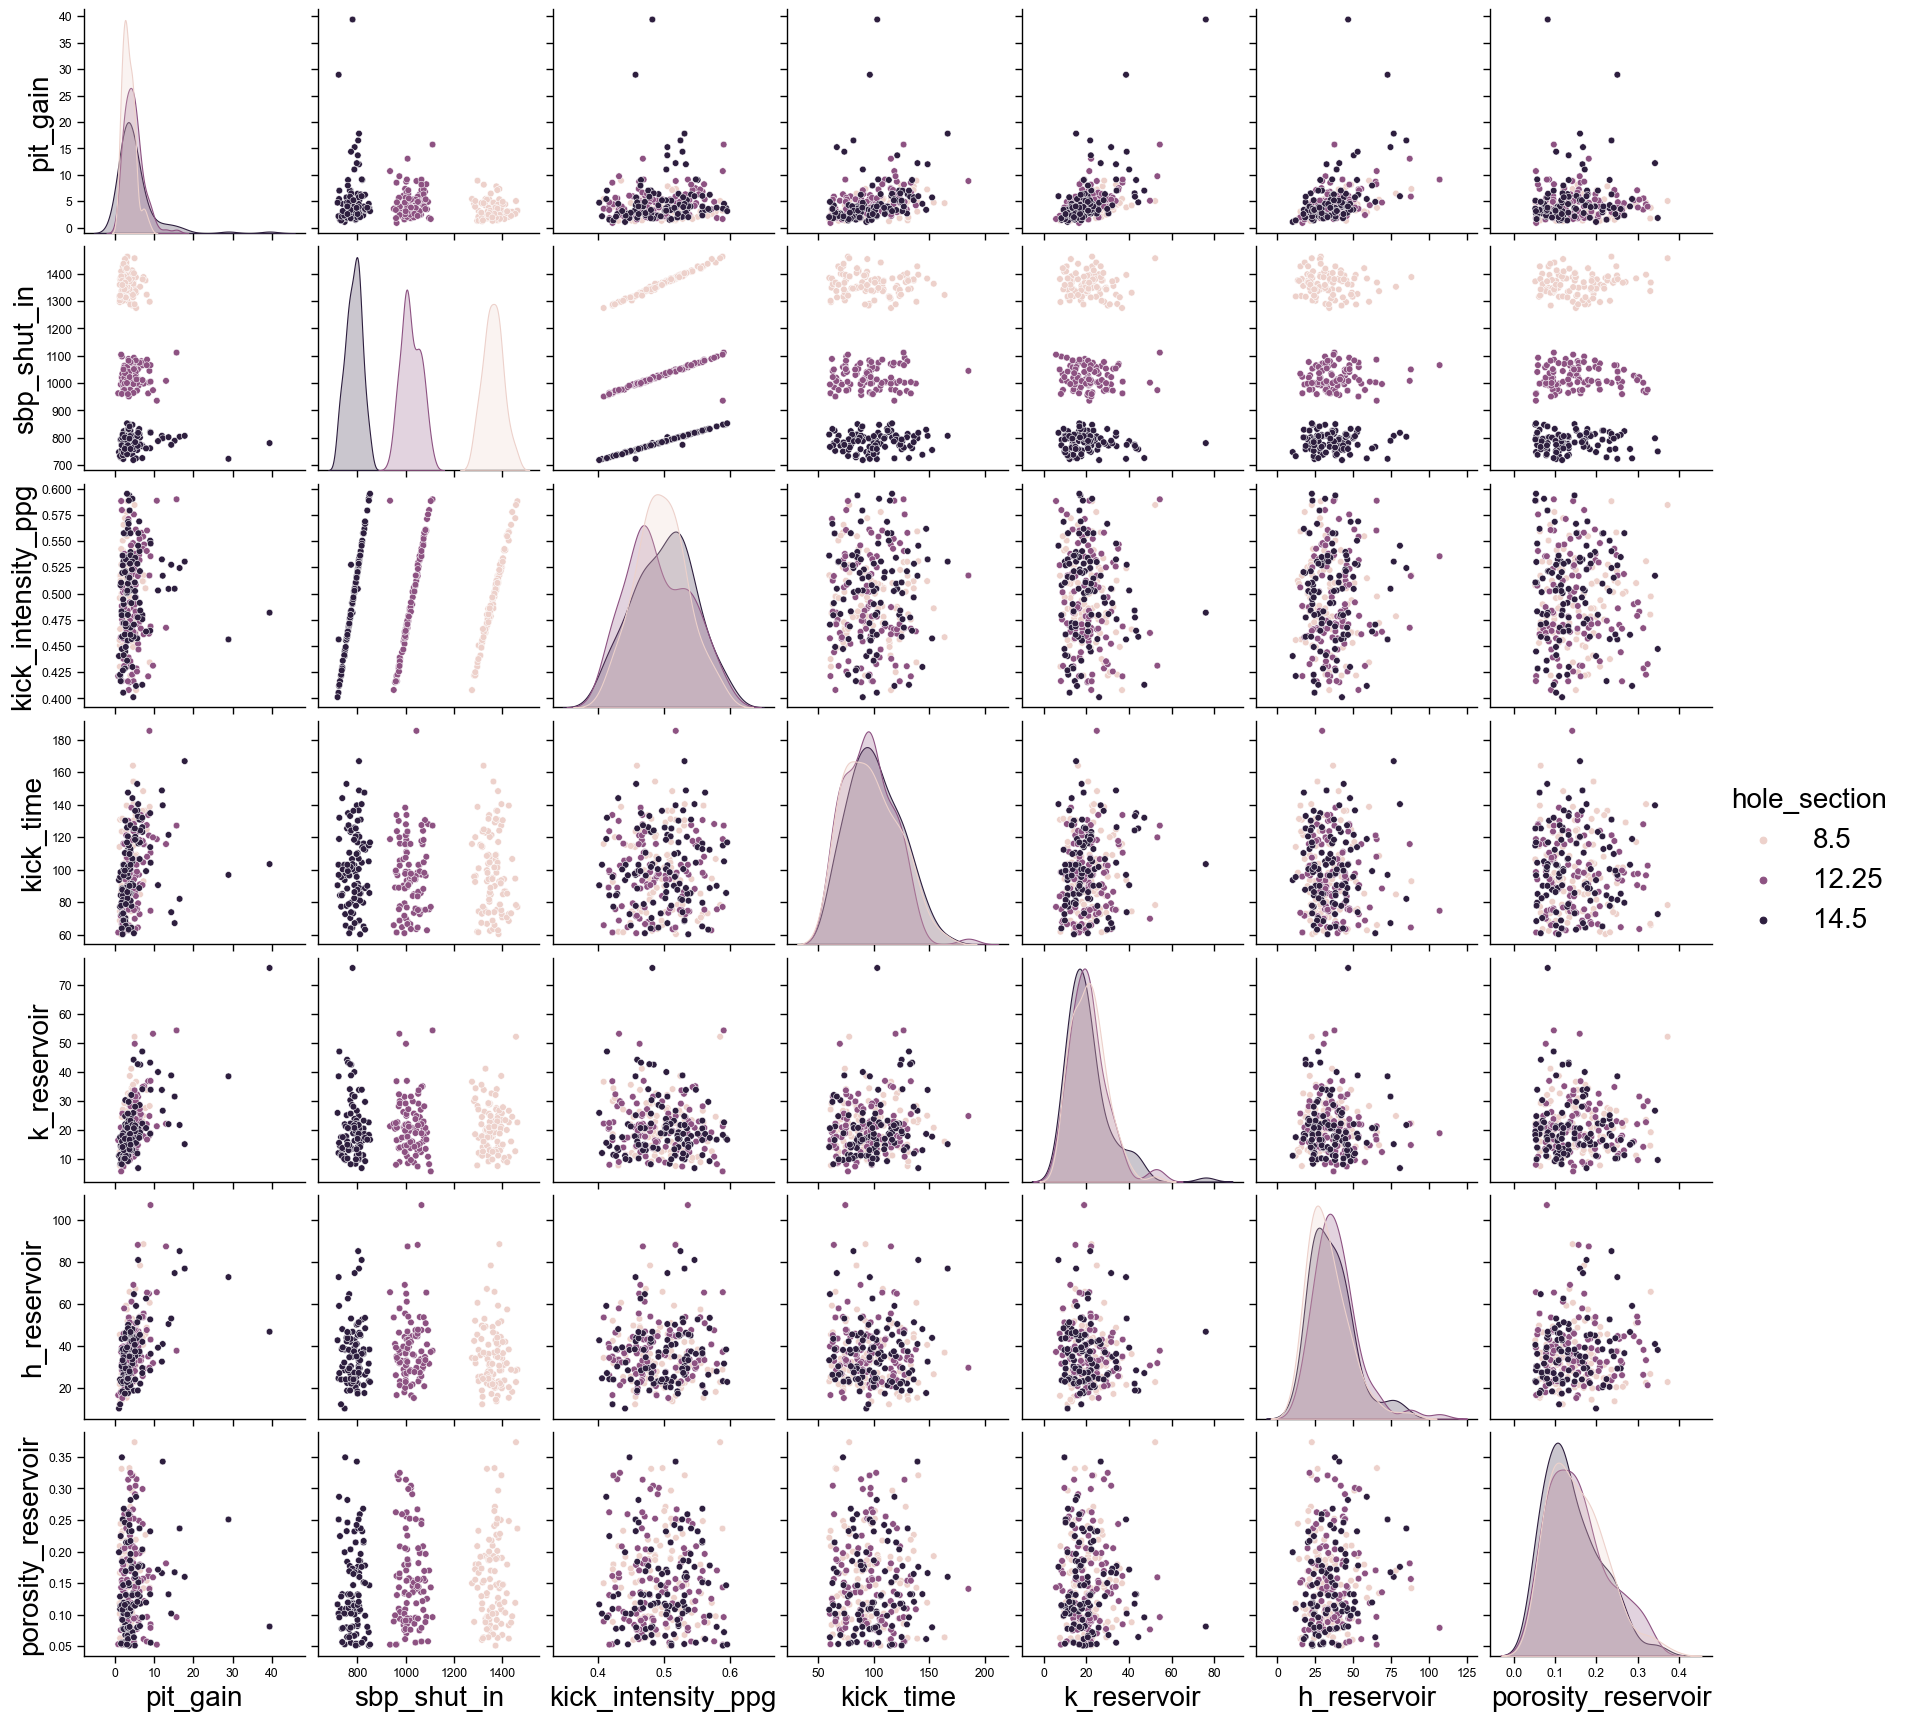

In [9]:
# Visualize a pairplot of the main features
sns.set_context("paper", rc={"axes.labelsize":20, "legend.fontsize":20, "legend.title_fontsize":20})
sns.pairplot(data_df.iloc[:,:-2],hue='hole_section')
# plt.grid(False)
plt.show()

From the pairplot, the following can be observed:
- There is a certain degree of correlation between pit gain and kick time, reservoir permeability and exposed length
- There is a high degree of correlation between the shut-in wellhead pressure and kick intensity
- The parameters distributions for each section seem to respect the same type of distribution and coverage (except for shut-in pressure)
- There is a clear difference in shut-in pressure distribution for each section, which should be directly related to the total depth of the section, which affects the kick intensity pressure (since kick intensity is expressed in the same distribution of equivalent mud weight or density values)

Next, every parameter distribution is plotted.

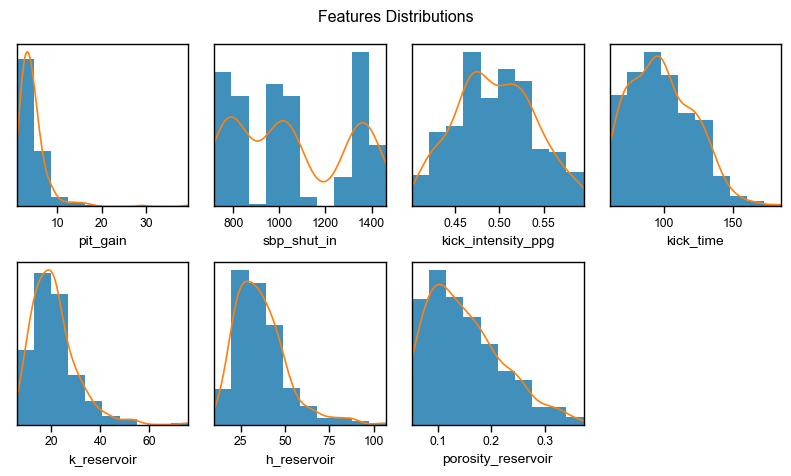

In [34]:
sns.set_context("paper", rc={"axes.labelsize":10, "legend.fontsize":10, "legend.title_fontsize":10})
columns = data_df.columns[:-3]
plt.figure(figsize=(8,8*.6))
plt.suptitle('Features Distributions')
for i,col in enumerate(columns):
#     col = columns[0]
    i+=1
    plt.subplot(2,4,i)
    x = data_df[col]
    plt.hist(x, bins=10, density=True, align='mid', alpha=0.75)
    sns.kdeplot(x)
    plt.ylabel('')
    plt.yticks([])
    plt.xlim(x.min(),x.max())
    
plt.tight_layout()
plt.show()

It is observed from the features distributions:
- Pit gain seems to have a log-normal distribution, which can relate to the distributions of permeability and reservoir exposed length which are part of the model's input parameters
    - Although the distribution is squewed to the left, there seems to be outliers in the right tail. These could be later removed
- Wellhead shut-in pressure (sbp_shut_in) has 3 separate distributions defined for each section
- Kick intensity, kick time and reservoir porosity are synthetic distributions generated as model input parameters, and all have truncated normal distributions
- Reservoir permeability and reservoir exposed length are also synthetic distributions used as model input parameters, and both have log-normal distributions

Next, the target parameter (kick classification) is analyzed.

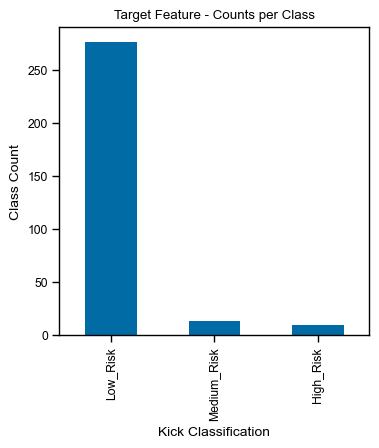

In [55]:
plt.figure(figsize=(4,4))
plt.title('Target Feature - Counts per Class')
data_df['kick_classification'].value_counts().plot(kind='bar')
plt.xlabel('Kick Classification')
plt.ylabel('Class Count')
plt.show()

As observed in the previous barplot, the target feature is highly imbalanced, with most of the sampels fallins into the 'Low Risk' classification.

### Name of My Workflow

A short summary of your workflow. This is a suggestion. The main thing is to be clear and concise. Easy to follow!

1. If helpful, you could include

2. enumeration

### 1. Name Your First Workflow Step

This is a short summary of this step.

Short Markdown block, code, concise and essential output summaries, repeat  

### 2. Name Your Second Workflow Step

Repeat as needed

### Results

Final summary of results, include table (DataFrame) and / plots, answer the problem and demonstrate the work stated in the executive summary.

### Parting Comments / Promote You

Consider adding any information to promote your capabilities, interest in internships, full-time positions. 

* This workflow will be shared / posted online and will promote you. 

* It is optional to retain my information below yours. This may also provide some ideas.



I hope this was helpful,

*You name*

___________________

#### Work Supervised by:

### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin
